# [개념 필사]

## CHAPTER 09 <비지도 학습>


## **9.2 가우시안 혼합**

◾**GMM**: 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

* 분포 1개에서 생성된 샘플은 1개의 타원형 클러스터 형성

* 각 클러스터는 모양, 크기, 밀집도, 방향 다름

* 생성 모델이므로, 새로운 샘플을 만들 수 있음.
* 모델 밀도 추정 가능

💻 GaussianMixture (GMM 중 가장 간단한 버전)

* 가우시안 분포 개수를 알고 있어야 함.
* 기댓값-최대화 (EM)알고리즘

```
prodict() - 하드 군집

predict_proba() - 소프트 군집

score_samples() - 주어진 위치에서 확률밀도함수의 로그 예측. 점수가 높을수록 밀도 높은 것.
```

❗특성, 클러스터가 많거나 샘플이 적을 때는 EM이 최적 솔루션으로 수렴하기 어려움.

=> 클러스터 모양, 방향 제한 (학습 파라미터 제한)

💻 covariance_type="full" (제약 없는 디폴트)  
```
"spherical" - 모든 클러스터 원형. 지름 상이

"diag" - 공분산 행렬이 대각 행렬

"tied" - 모든 클러스터가 동일한 공분산 행렬
```

## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

◾**이상치 탐지**: 정상치와 많이 다른 샘플을 감지하는 작업.

* 부정 거래 감지, 제조 결함 감지

✅ In GMM, 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 간주.

* 밀도 임곗값 설정

◾**특이치 탐지**: 이상치로 오염되지 않은 깨끗한 데이터셋을 사용하는 작업.


## 9.2.2 클러스터 개수 선택

💡 BIC, AIC 같은 이론적 정보 기준을 최소화하는 개수를 선택.
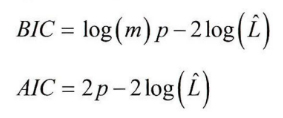

💻 bic(), aic() 로 계산


## 9.2.3 베이즈 가우시안 혼합 모델

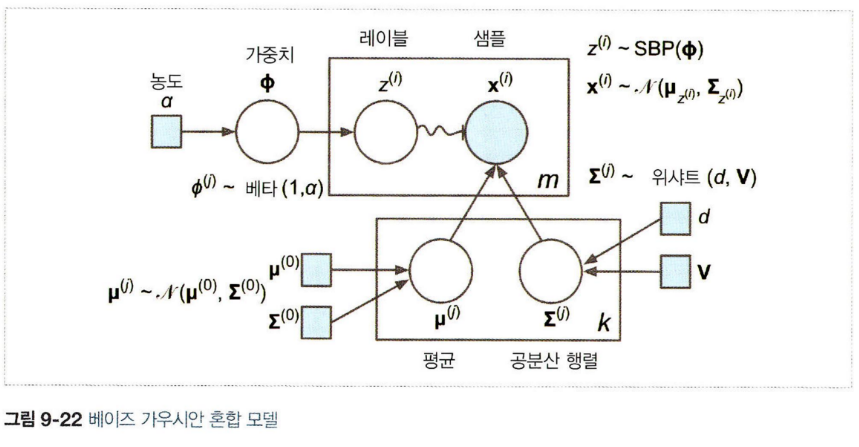


💻 BayesianGaussianMixture - 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0, 0에 가깝게 만드는 클래스

* 베타 분포: 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용됨

💻 weight_concentration_prior - 클러스터 개수에 대한 사전 믿음 조정

❗베이즈 정리에서 p(x)를 계산하기 어려움

=> 변분추론: 자체적인 변분 파라미터 선택 후, 좋은 근삿값이 되도록 이 파라미터를 최적화. (KL발산공식)

=> (실전) 평균장 변분 추론

* 블랙 박스 확률적 변분 추론: ELBO를 최대화하는 간단한 방법. / 각 반복에서 몇 개의 샘플을 q에서 뽑아 변분 파라미터에 대한 ELBO의 그레이디언트를 추정하는 데 사용. / 심층 신경망에 사용하면 베이즈 딥러닝.


## 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

* PCA (+inverse_transform())

* Fast-MCT: EllipticEnvelope 클래스, 데이터셋 정제에 사용. 하나의 가우시안 분포에서 샘플이 생성되었다고 가정.

* 아이솔레이션 포레스트: 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘.

* LOF: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도 비교.

* one-class SVM: 특이치 탐지에 적합.


# [코드 필사]

In [1]:
import numpy as np

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,noise=0.05)

In [2]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [3]:
gm.weights_

array([0.2054162 , 0.20242819, 0.5921556 ])

In [4]:
gm.means_

array([[-0.74630108,  0.56325479],
       [ 1.74941465, -0.05367484],
       [ 0.50674075,  0.2485095 ]])

In [5]:
gm.covariances_

array([[[ 0.05537406,  0.06291767],
        [ 0.06291767,  0.08680981]],

       [[ 0.05231746,  0.06303514],
        [ 0.06303514,  0.09049112]],

       [[ 0.16926058, -0.10515331],
        [-0.10515331,  0.29325225]]])

In [6]:
gm.converged_ # 알고리즘 수렴 여부 확인

True

In [7]:
gm.n_iter_ # 수렴까지의 반복 횟수 확인

17

In [8]:
gm.predict(X) # 하드군집

array([1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1,
       2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2,

In [9]:
gm.predict_proba(X) # 소프트 군집

array([[4.32282722e-202, 9.98921284e-001, 1.07871616e-003],
       [6.57838952e-200, 9.99903555e-001, 9.64449260e-005],
       [8.60854076e-109, 5.36710892e-014, 1.00000000e+000],
       ...,
       [6.66417289e-205, 9.90071695e-001, 9.92830534e-003],
       [2.96242738e-049, 5.58288350e-056, 1.00000000e+000],
       [8.03021933e-001, 9.75835953e-202, 1.96978067e-001]])

In [10]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.62321924, -0.0371189 ],
       [ 1.9754677 ,  0.24864747],
       [ 0.68910339, -0.77737014],
       [ 0.37299011, -0.27962009],
       [ 0.49513735,  0.4556105 ],
       [ 0.56787597,  0.75118126]])

In [11]:
y_new

array([1, 1, 2, 2, 2, 2])

In [12]:
gm.score_samples(X)

array([-1.15246467e-01, -7.26181872e-01, -1.59959364e+00, -2.87424244e-01,
       -5.98453059e-02, -1.40990792e+00, -5.72732971e-01, -1.78167479e+00,
       -2.12367282e+00, -1.55613441e+00, -1.81938586e+00, -4.41310249e-01,
       -1.56911552e+00, -2.04025832e+00, -1.30167834e+00, -1.66022852e+00,
       -1.62715626e+00, -1.73988190e+00, -1.26489998e+00, -9.67387208e-01,
       -8.38951752e-01, -1.69165538e+00, -1.26187687e+00, -1.48097635e+00,
       -2.21242879e+00, -1.38441371e+00, -1.50480259e+00, -2.04171457e+00,
       -1.92156387e-01, -1.64912842e+00, -1.46636412e+00, -1.94862085e+00,
       -1.57078032e+00, -1.68862816e+00, -1.58286705e+00, -1.56639697e+00,
       -1.87471788e+00, -1.32174292e+00, -1.44778168e+00, -1.43460259e+00,
       -1.71242231e+00, -2.61138658e-01, -2.19064836e+00, -4.49861640e-01,
       -1.33355548e+00, -1.14555939e+00,  1.23627509e-01, -2.14040701e+00,
       -5.12236617e-01, -1.95176791e+00, -1.69677811e+00, -1.83466136e+00,
       -1.49391125e+00, -

In [13]:
## 4번째 백분위수 -> 밀도 임곗값

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [14]:
## BIC, AIC

gm.bic(X)

np.float64(2750.0499083288246)

In [15]:
gm.aic(X)

np.float64(2666.618068586128)

In [16]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

array([0.15, 0.11, 0.1 , 0.  , 0.15, 0.12, 0.17, 0.  , 0.19, 0.  ])